In [2]:
import numpy as np
import ROOT

Welcome to JupyROOT 6.18/04


In [3]:
def f(x, p):
    return (1 / (x[0]**2 + 1.0) + 1.0 + x[0])/p[0]

In [4]:
a = -1
b = 1
n_count = 1000
attempts = 20

In [5]:
x_values = np.linspace(a, b, n_count).reshape(-1,1)
max_f = f(x_values[-1], [1,]) 

In [34]:
def Neyman(a, b, n_count, f, max_f):
    while True:
        e = ROOT.gRandom.Uniform(0, 1)
        n = ROOT.gRandom.Uniform(0, 1)
        r = (b-a)*e + a
        r_value = [r,]
        m = max_f*n
        if m <= f(r_value, [1,]):
            return r

In [35]:
random_values = np.arange(n_count, dtype = np.float32)
values = np.arange(attempts, dtype = np.float32)

for k in range(attempts):
    
    ROOT.sw = ROOT.TStopwatch()
    ROOT.sw.Start()

    for i in range (n_count):
        random_values[i] = Neyman(a, b, n_count, f, max_f)

    ROOT.sw.Stop()
    values[k] = ROOT.sw.CpuTime()

print(f"mean: {random_values.mean()}, std: {random_values.std()}")

Neyman_time = values.mean()

print(f"average CP time: {Neyman_time}")

mean: 0.1754884272813797, std: 0.5105710029602051
average CP time: 0.005999999586492777


In [8]:
from ROOT import TH1F, TCanvas, TF1

In [9]:
hist = TH1F("hist", "Histogram", 300, -1, 1)

for i in range(n_count):
    hist.Fill(random_values[i])

In [10]:
c1 = TCanvas("c1", "Histogram", 500, 500)

In [23]:
f1 = TF1("f", f, -1, 1, 1)
f1.SetParameter(0,1850)

In [ ]:
hist.Fit(f1)

In [11]:
c1.DrawFrame(-1,0,1,6000);

f1.Draw("SAME")
hist.Draw("SAME")
c1.Draw("SAME")

NameError: name 'f1' is not defined

In [12]:
#random = ROOT.TRandom2()

In [13]:
def g1(x):
    return 2/np.pi*(1/(1+x**2))
def g2(x):
    return 0.5*(1+x)

In [14]:
a_1 = np.pi / (np.pi + 4)
a_2 = 4 /(np.pi + 4) 
c = np.pi*0.5
border_1 = -0.5*c
border_2 = 0.5*c

In [38]:
def composition_method(p):
    choice = ROOT.gRandom.Uniform(0, 1)
    xi = ROOT.gRandom.Uniform(0, 1)
    if choice <= p:
        return ROOT.TMath.Tan(np.pi*0.5*(xi - 0.5))
    else:
        return -1 + 2*ROOT.TMath.Sqrt(xi)

In [39]:

def fastest_composition_method(p):
    if ROOT.gRandom.Uniform(0, 1) <= p:
        return ROOT.TMath.Tan(ROOT.gRandom.Uniform(border_1, border_2))
    else:
        return -1 + ROOT.TMath.Sqrt(ROOT.gRandom.Uniform(0, 4))

In [40]:
for k in range(attempts):
    ROOT.sw = ROOT.TStopwatch()
    ROOT.sw.Start()

    for i in range (n_count):
        random_values[i] = composition_method(a_1)

    ROOT.sw.Stop()
    
    values[k] = ROOT.sw.CpuTime()

print(f"mean: {random_values.mean()}, std: {random_values.std()}")
composition_method_time = values.mean()
print(f"average CP time: {composition_method_time}")

mean: 0.22775526344776154, std: 0.5203369855880737
average CP time: 0.003999999724328518


In [41]:
Neyman_time/composition_method_time

1.5

In [44]:
for k in range(attempts):
    ROOT.sw = ROOT.TStopwatch()
    ROOT.sw.Start()

    for i in range (n_count):
        random_values[i] = fastest_composition_method(a_1)

    ROOT.sw.Stop()
    
    values[k] = ROOT.sw.CpuTime()

print(f"mean: {random_values.mean()}, std: {random_values.std()}")
fastest_composition_method_time = values.mean()
print(f"average CP time: {fastest_composition_method_time}")

mean: 0.1889503300189972, std: 0.5223883390426636
average CP time: 0.003999999724328518


In [43]:
Neyman_time/fastest_composition_method_time

1.7142855

In [21]:
hist2 = TH1F("hist", "Histogram", 30, -1, 1)

for i in range(n_count):
    hist2.Fill(random_values[i])

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


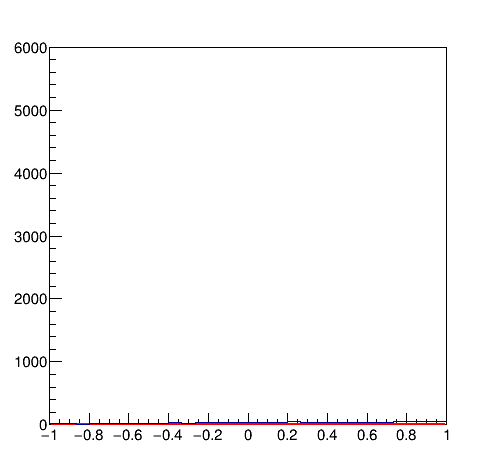

In [24]:
f2 = TF1("f", f, -1, 1, 1)
f2.SetParameter(0,1850)

c1.DrawFrame(-1,0,1,6000);
f1.Draw("SAME")
hist2.Draw("SAME")
c1.Draw("SAME")